<a href="https://colab.research.google.com/github/aliemadabdo/ML-Basics/blob/main/lab3_task-second_order_LR_eqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the required modules, numpy for calculation, and Matplotlib for drawing
import numpy as np 
import matplotlib.pyplot as plt 
import csv

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
30
<class 'csv.DictReader'>
<class 'dict'>


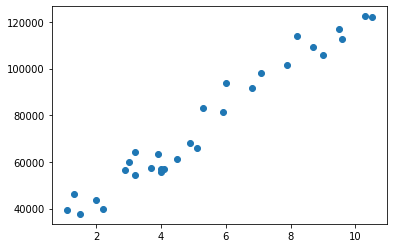

In [2]:
y, x=[], []
with open('Salary.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",") #list of dics
    for row in reader:
      x += [float(row['x'])]
      y += [int(float(row['y']))]

x=np.array(x)
y=np.array(y)
#Show the effect of a scatter plot
print(x)
print(y.size)
print(type(reader)) 
print(type(row)) 

plt.scatter(x,y)
 


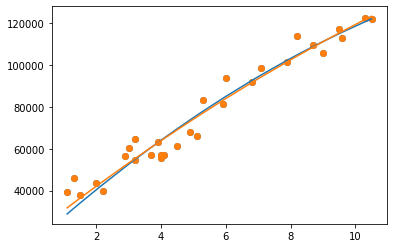

In [24]:
#The basic linear regression model is wx+ b, and since this is a two-dimensional space, the model is ax+ b
def model(a, b, c, x): 
  return a*x + b*x**2 +c
#The most commonly used loss function of linear regression model is the loss function of mean variance difference 
def loss_function(a, b,c, x, y): 
  num = len(x) 
  #print(f"befor model fn {a}") 
  prediction=model(a,b,c,x) 
  #print(f"after model fn {a}") 
  return (0.5/num) * (np.square(prediction-y)).sum()
#The optimization function mainly USES partial derivatives to update two parameters a and b 
def optimize(a,b,c,x,y): 
  num = len(x) 
  prediction = model(a,b,c,x) 
  #Update the values of A and B by finding the partial derivatives of the loss function on a and b 
  da = (1.0/num) * ((prediction -y)*x).sum() 
  db = (1.0/num) * (((prediction -y)*x**2).sum())
  dc = (1.0/num) * ((prediction -y).sum())
  # print(f"befor equation fn {a}") 
  a = a -Lr*da 
  #print(f"after equation fn {a}") 
  b = b -Lr*db 
  c = c -Lr*dc 
  return a, b,c
#iterated function, return a and b 
def iterate(a,b,c,x,y,times): 
  for i in range(0,times):
    #print(f"befor optmize fn {a}") 
    a,b,c = optimize(a,b,c,x,y)
   # print(f"after optmize fn {a}") 
  #  print(a) 
  return a, b, c 

#Initialize parameters and display 
a = np.random.rand(1)
#print(a) 
b = np.random.rand(1) 
#print(b)
c = np.random.rand(1) 
Lr = 0.0001
#For the first iteration, the parameter values, losses, and visualization after the iteration are displayed 
for itr in range(1,3):
  # print(itr)
  a,b,c = iterate(a,b,c,x,y,100000) 
  prediction=model(a,b,c,x) 
  loss = loss_function(a, b,c, x, y) 
  #print(a,b,loss)
  #print(f"y =\n {y}\n\n x =\n {x}\n\n prediction =\n {prediction}") 
  plt.scatter(x,y) 
  plt.plot(x,prediction)
 # print(f"after each plot {a}") 
# print(a)
